# Final Project - Josephine Light 
### Classifying Vehicle vs. Non Vehicle 

---

## Importing Libraries and reading in the images  

In [2]:
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline

In [3]:
vehicle_list=[]
nonvehicle_list=[]
combined_list =[]
std_images = []

for file in glob.glob("data/vehicles/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the VEHICLE list 0 = VEHICLE
    vehicle_list.append((im, 0))
    
for file in glob.glob("data/non-vehicles/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the NON VEHICLE list 1 = NON VEHICLE
    nonvehicle_list.append((im, 1))
      
print(len(vehicle_list))
print(len(nonvehicle_list))

combined_list = vehicle_list + nonvehicle_list
print(len(combined_list))

8792
8792
17584


(64, 64, 3)


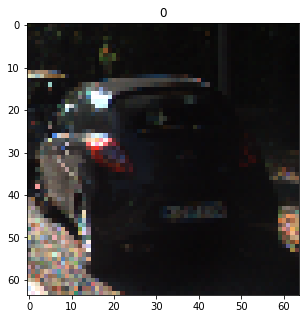

In [4]:
# printing my combined list and calling the shape and plotting the image
print(combined_list[0][0].shape)
f, (ax1) = plt.subplots(1, 1, figsize=(5, 5))
ax1.set_title(combined_list[0][1])
ax1.imshow(combined_list[0][0])

In [5]:
# stabdardizing the images to 32 by 32 to make sure all the images in combined_list are the same 
def standardize_input(image):
    image_crop = np.copy(image)
    row_crop = 7
    col_crop = 8
    image_crop = image[row_crop:-row_crop, col_crop:-col_crop, :]
    standard_im = cv2.resize(image_crop, (32, 32))
    return standard_im

In [6]:
import cv2 # helper functions

def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterating through the images and assigning 0 and 1 to image and label
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # Append the image
        standard_list.append((standardized_im, label))
        
    return standard_list

std_images = standardize(combined_list)

In [7]:
# printing the std_images to make sure standardizing the images worked
print(std_images[0][0].shape)

(32, 32, 3)


(32, 32, 3)


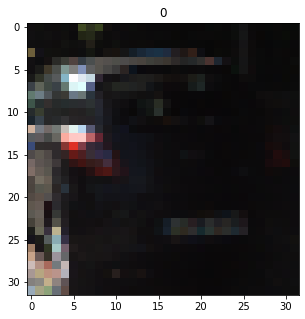

In [8]:
# now printing the standarized image 
print(std_images[0][0].shape)
f, (ax1) = plt.subplots(1, 1, figsize=(5,5))
ax1.set_title(std_images[0][1])
ax1.imshow(std_images[0][0])

### Concatenating and splitting the list

In [9]:
# concatenating the vehicle_list and nonvehicle_list to be able to split the data 
# adding vehicle_list and non_vehicle list together to grab the labels from the images 

images = np.concatenate((vehicle_list,nonvehicle_list))
#print(vehicle.shape)
#print(non_vehicle.shape)
print(images.shape)

labels = vehicle_list + nonvehicle_list


(17584, 2)


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [10]:
# Finally, splitting the data from sklearn and calling the variables 
# train_images, train_labels, test_images, and test_labels 
from sklearn.model_selection import train_test_split

train_images, train_labels, test_images, test_labels = train_test_split(images, 
                                                                        labels, test_size=0.2, random_state=0)

# Tensor Flow Analysis 

In [12]:
# Uploading Tensorflor and keras 
import tensorflow as tf

print(tf.__version__)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

2.10.0


In [13]:
# using the Adam operator 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the Model

In [14]:
# training the model and creating empty lists of the train_images and train_labels 
import random

train_images = []
train_labels = []

print(len(std_images))
random.shuffle(std_images)

for im in std_images:
    train_images.append(im[0])
    train_labels.append(im[1])
    
print(train_labels)

17584
[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 

In [15]:
# testing the training data for accuracy 
train_images = np.array(train_images)
train_labels = np.array(train_labels)
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
550/550 [==============================] - 2s 2ms/step - loss: 0.4081 - accuracy: 0.8283
Epoch 2/10
550/550 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.8784
Epoch 3/10
550/550 [==============================] - 1s 2ms/step - loss: 0.2616 - accuracy: 0.8936
Epoch 4/10
550/550 [==============================] - 1s 2ms/step - loss: 0.2444 - accuracy: 0.8996
Epoch 5/10
550/550 [==============================] - 1s 2ms/step - loss: 0.2077 - accuracy: 0.9180
Epoch 6/10
550/550 [==============================] - 1s 2ms/step - loss: 0.1979 - accuracy: 0.9215
Epoch 7/10
550/550 [==============================] - 1s 2ms/step - loss: 0.1795 - accuracy: 0.9314
Epoch 8/10
550/550 [==============================] - 1s 2ms/step - loss: 0.1687 - accuracy: 0.9357
Epoch 9/10
550/550 [==============================] - 1s 2ms/step - loss: 0.1560 - accuracy: 0.9435
Epoch 10/10
550/550 [==============================] - 1s 2ms/step - loss: 0.1596 - accuracy: 0.9419

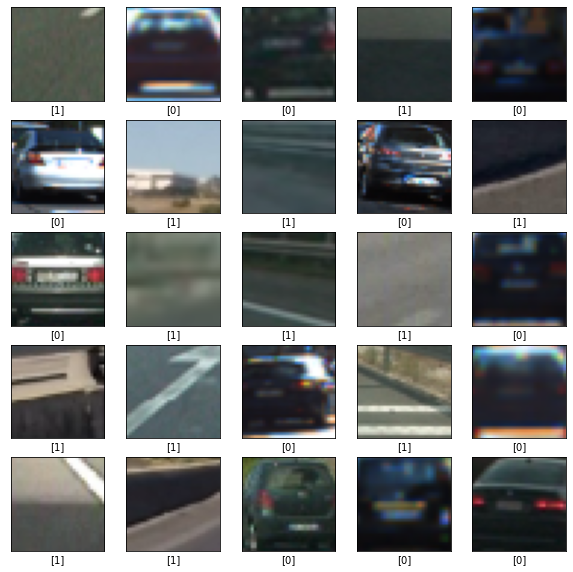

In [16]:
# plotting the train images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel([train_labels[i]])
plt.show()

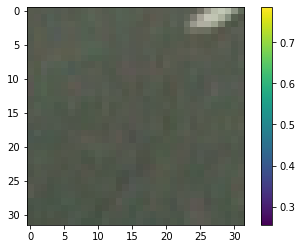

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Evaluating Accuracy 

In [18]:
# Now it is time to look at the test data 

import random

test_images = []
test_labels = []

print(len(std_images))
random.shuffle(std_images)

for im in std_images:
    test_images.append(im[0])
    test_labels.append(im[1])
    
print(test_labels)

17584
[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 

In [19]:
# testing the test data for accuracy 
# the test accuracy is much higher than the train data 
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.fit(test_images, test_labels, epochs=10)

Epoch 1/10
550/550 [==============================] - 1s 3ms/step - loss: 0.1377 - accuracy: 0.9508
Epoch 2/10
550/550 [==============================] - 1s 3ms/step - loss: 0.1383 - accuracy: 0.9493
Epoch 3/10
550/550 [==============================] - 1s 2ms/step - loss: 0.1237 - accuracy: 0.9534
Epoch 4/10
550/550 [==============================] - 1s 2ms/step - loss: 0.1311 - accuracy: 0.9533
Epoch 5/10
550/550 [==============================] - 1s 2ms/step - loss: 0.1129 - accuracy: 0.9591
Epoch 6/10
550/550 [==============================] - 1s 2ms/step - loss: 0.1144 - accuracy: 0.9585
Epoch 7/10
550/550 [==============================] - 1s 3ms/step - loss: 0.1076 - accuracy: 0.9617
Epoch 8/10
550/550 [==============================] - 1s 3ms/step - loss: 0.0960 - accuracy: 0.9643
Epoch 9/10
550/550 [==============================] - 1s 2ms/step - loss: 0.0931 - accuracy: 0.9671
Epoch 10/10
550/550 [==============================] - 1s 2ms/step - loss: 0.0915 - accuracy: 0.9682

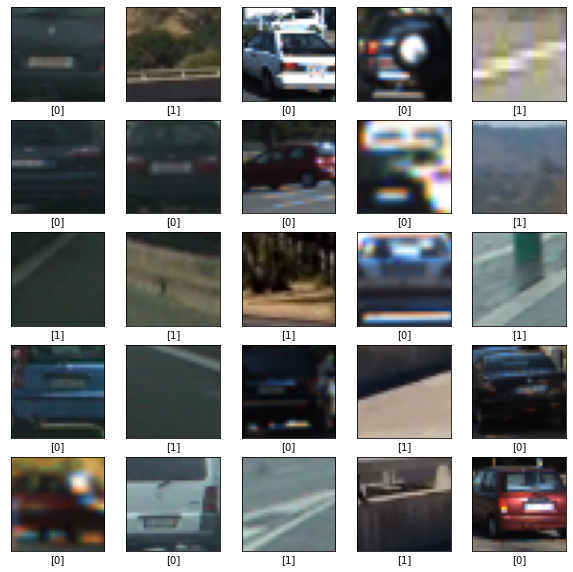

In [20]:
# plotting the test data 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel([test_labels[i]])
plt.show()

In [21]:
# comparing the test loss and test accuracy with the test images and test labels
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

550/550 - 1s - loss: 0.0713 - accuracy: 0.9756 - 790ms/epoch - 1ms/step
Test accuracy: 0.9756028056144714


# Making Predictions

In [22]:
# now I am going to start making predictions based off of my probability model 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

550/550 [==============================] - 1s 1ms/step


In [24]:
predictions[0]

array([7.4824625e-01, 2.5175372e-01, 4.5732949e-11], dtype=float32)

# Logistic Regression 

In [25]:
# checking the shape and size of my lists to ensure they are spitting out the correct dimensions 
print(vehicle_list[0][0].shape)
print(nonvehicle_list[0][0].shape)
print(combined_list[0][0].shape)
print(std_images[0][0].shape)
print('Vehicle Length: ' + str(len(vehicle_list)))
print('Non Vehicle Length: ' + str(len(nonvehicle_list)))
print(len(std_images))
print(len(combined_list))

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(32, 32, 3)
Vehicle Length: 8792
Non Vehicle Length: 8792
17584
17584


### Have to reopen the file to be able to resize the images correctly to calculate the accuracy score

In [26]:
# creating new vehicle and non vehicle lists without labels of 0 and 1 to calculate Logistic Regression
vehicleList2=[]

for file in glob.glob("data/vehicles/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    vehicleList2.append(im)
    
print(len(vehicleList2))

8792


In [30]:
nonVehicleList2=[]

for file in glob.glob("data/non-vehicles/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    nonVehicleList2.append(im)
    
print(len(nonVehicleList2))

8792


In [31]:
# creating empty lists for the labels to call in the accuracy score 
vehicle_labels = []
non_vehicle_labels = []
for i in range(8792): 
    vehicle_labels += ['vehicle']
    non_vehicle_labels += ['non_vehicle']

In [32]:
# Resizing the arrays to calculate the accuracy scores 

# multiplying 64x64x3 to correctly resize the list to the correct dimensions 
vehicle = np.asarray(vehicleList2)
print(vehicle.shape)
vehicle = vehicle.reshape(8792,12288)
vehicle.shape

non_vehicle = np.asarray(nonVehicleList2)
print(non_vehicle.shape)
#vehicle = np.ndarray.flatten(vehicle,c)
non_vehicle = non_vehicle.reshape(8792,12288)
non_vehicle.shape

images_reshape = np.concatenate((vehicle,non_vehicle))
print(vehicle.shape)
print(non_vehicle.shape)
print(images_reshape.shape)

labels_reshape = vehicle_labels + non_vehicle_labels
print(len(labels_reshape))

(8792, 64, 64, 3)
(8792, 64, 64, 3)
(8792, 12288)
(8792, 12288)
(17584, 12288)
17584


In [33]:
# splitting the data again with the new reshaped data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_reshape, labels_reshape, test_size=0.2, random_state=0)

In [249]:
# now creating a logistic regression variable t make predictions 
logisticRegr = LogisticRegression()

In [251]:
logisticRegr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [252]:
# predicting 0-10
logisticRegr.predict(X_test[0:10])

array(['non_vehicle', 'vehicle', 'non_vehicle', 'non_vehicle',
       'non_vehicle', 'vehicle', 'vehicle', 'non_vehicle', 'non_vehicle',
       'vehicle'], dtype='<U11')

In [253]:
predictions = logisticRegr.predict(X_test)
predictions

array(['non_vehicle', 'vehicle', 'non_vehicle', ..., 'non_vehicle',
       'vehicle', 'non_vehicle'], dtype='<U11')

### Logistic Regression Score

In [254]:
# LOGISTIC REGRESSION SCORE

clf = LogisticRegression(random_state=0,max_iter=8792).fit(X_train, y_train)
print('Accuracy Score: ', clf.score(X_test,y_test))

Accuracy Score:  0.9294853568382144


In [212]:
# holding the actual score in a variable
score = 0.929485
score

0.929485

In [216]:
# creating a confusion matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

# we have 1708 + 82 correct predictions 
# and 144 + 1583 incorect predictions

[[1708   82]
 [ 144 1583]]


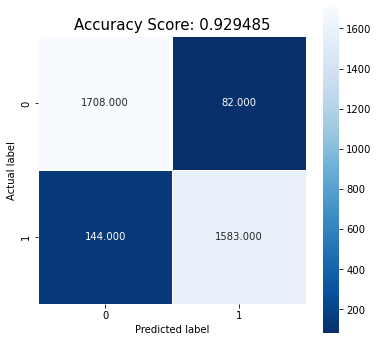

In [215]:
# Plotting the Confusion Matrix 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);